Лабораторная работа №3 Вяткина Арина Минеева Анна

# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектах будут присутсвовать разные классы. В этом случае необходимо присваивать класс, использую kNN при $k=1$.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math
import numpy as np
import random as rd

In [3]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

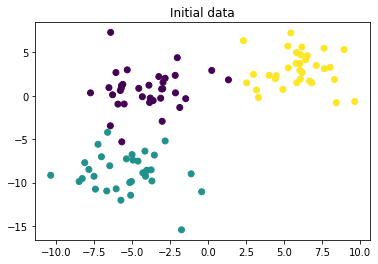

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [5]:
def funct_kNN(x_train, y_train, x_test, k):
    y_test = []
    # В labels будем добавлять метки классов соседей
    labels = [0] * k
    # Для каждого объекта тестового набора данных вычисляем расстояние между 
    # всеми объектами тренировочного набора
    sum_dist = [0] * len(x_train)
    for i in range(len(x_test)):
        for j in range(len(x_train)):
            sum_dist[j] = math.sqrt((x_train[j][0] - x_test[i][0]) ** 2 + (x_train[j][1] - x_test[i][1]) ** 2)
            # Определяем  𝑘  наименьших расстояний
            new_dist = sorted(sum_dist)[0:k]
            
        for j in new_dist:
            for neighbour in range(k):
                labels[neighbour] = y_train[sum_dist.index(new_dist[neighbour])]
        # Проводим сравнение
        if (labels.count(0) == labels.count(1)) & (labels.count(0) == labels.count(2)):
            k = 1
            y_test = funct_kNN(x_train, y_train, x_test, k)
        elif (labels.count(0) > labels.count(1)) & (labels.count(0) > labels.count(2)):
            y_test.append(0)
        elif (labels.count(1) > labels.count(0)) & (labels.count(1) > labels.count(2)):
            y_test.append(1)
        else:
            y_test.append(2)
    return np.array(y_test)

In [6]:
def funct_kNN1(x_train, y_train, x_test, k):
    y_test = []
    # В labels будем добавлять метки классов соседей
    labels = [0] * k
    # Для каждого объекта тестового набора данных вычисляем расстояние между 
    # всеми объектами тренировочного набора
    sum_dist = [0] * len(x_train)
    for i in range(len(x_test)):
        for j in range(len(x_train)):
            sum_dist[j] = math.sqrt((x_train[j][0] - x_test[i][0]) ** 2 + (x_train[j][1] - x_test[i][1]) ** 2 + (x_train[j][2] - x_test[i][2]) ** 2 + (x_train[j][3] - x_test[i][3]) ** 2)
            # Определяем  𝑘  наименьших расстояний
            new_dist = sorted(sum_dist)[0:k]
            
        for j in new_dist:
            for neighbour in range(k):
                labels[neighbour] = y_train[sum_dist.index(new_dist[neighbour])]
        # Проводим сравнение
        if (labels.count(0) == labels.count(1)) & (labels.count(0) == labels.count(2)):
            k = 1
            y_test = funct_kNN(x_train, y_train, x_test, k)
        elif (labels.count(0) > labels.count(1)) & (labels.count(0) > labels.count(2)):
            y_test.append(0)
        elif (labels.count(1) > labels.count(0)) & (labels.count(1) > labels.count(2)):
            y_test.append(1)
        else:
            y_test.append(2)
    return np.array(y_test)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k = (1, \dots , 9)$ метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

for k in (1,2,3,4,5,6,7):
    neighbours = funct_kNN(x_train, y_train, x_test, k)
    # Считаем точность с помощью  accuracy_score 
    accuracy = accuracy_score(y_test, neighbours)
    print('Accuracy for', k,'neighbours =', accuracy)

Accuracy for 1 neighbours = 0.9333333333333333
Accuracy for 2 neighbours = 0.9
Accuracy for 3 neighbours = 0.9333333333333333
Accuracy for 4 neighbours = 0.9333333333333333
Accuracy for 5 neighbours = 1.0
Accuracy for 6 neighbours = 1.0
Accuracy for 7 neighbours = 1.0


Постройте пример разделающих поверхностей для одного из значений $k$, которые строит классификатор.

For 1 neighbors


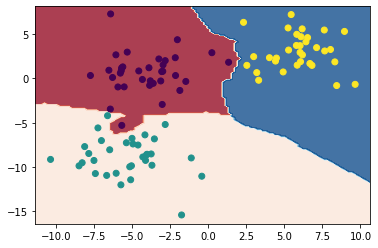

For 5 neighbors


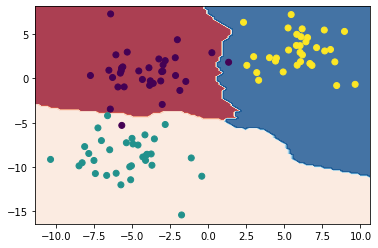

For 7 neighbors


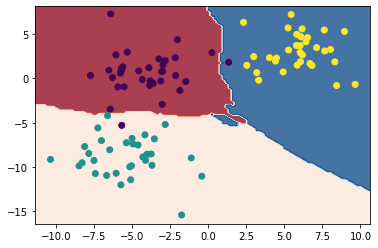

In [8]:
for k in (1,5,7):
    # Строим разделяющие поверхности для классов
    print('For', k, 'neighbors')
    h = 0.2
    x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
    y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = funct_kNN(X, Y, np.vstack((xx.ravel(), yy.ravel())).transpose(), k).reshape(xx.shape)
    #plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(X[:,0], X[:,1], c = Y)
    plt.show()

1. Возьмите набор данных ирисов из sklearn. Разделите набор данных случайным образом на подвыборки train (подвыборка для обучения алгоритма) и test (подвыборка для тестирования алгоритма) в отношении 4:1. Постройте классификатор при $k=3$ и оцените работу классификатора метриками presicion, recall для каждого класса. \
$TP$ - количество правильно классифицированных объектов как класс $k$; \
$FP$ - количество неправильно классифицированных объектов как класс $k$; \
$TN$ - количество правильно классифицированных объектов как класса отличного от $k$; \
$FN$ - количество неправильно классифицированных объектов как класс $k$.

$$Presicion = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$
Проведите анализ вашего классификатора.

2. Разделите набор данных случайным образом на подвыборки train (подвыборка для обучения алгоритма) и test (подвыборка для тестирования алгоритма) в отношении 4:1 так, чтобы концентрации элементов в train и test были одинаковы. Тут необходимо уточнить, что концентрация подразумевается как равная вероятность взять случайный объект и получить класс $k$ для обоих подвыборок.
Постройте классификатор при $k=3$ и оцените работу классификатора метриками presicion, recall для каждого класса.

In [13]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

x = load_iris().data
y = load_iris().target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

k = 3
neighbours = funct_kNN1(x_train, y_train, x_test, k)

# Оценим работу классификатора с помощью метрик
# Для этого используем classification_report 
accuracy = accuracy_score(y_test, neighbours)
metrics = classification_report(y_test, neighbours)
print('Accuracy:', accuracy)
print(metrics)

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Постройте confusion matrix для каждого случая и проведите оценку работы классификатора. Для визуализации можно использовать seaborn.

[1 0 1 0 1 1 2 2 2 2 1 2 1 0 2 1 1 0 2 1 2 1 0 2 2 0 2 0 0 2]
[1 0 1 0 1 1 2 2 2 2 1 2 1 0 2 2 1 0 2 1 2 1 0 2 2 0 2 0 0 2]


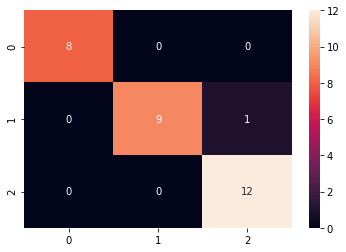

In [14]:
k = 4
output = funct_kNN1(x_train, y_train, x_test, 4)
import seaborn as sn
from sklearn.metrics import confusion_matrix
y_true = y_test[:len(output)]
y_pred = output
print(y_true)
print(y_pred)

sn.heatmap(confusion_matrix(y_true, y_pred), annot=True)

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции (с шагом 0.1 в диапазоне [0, 5]) для каждого значения $k$.

In [16]:
def funct_kNN2(x_train, y_train, x_test, k):
    y_test = []
    # В labels будем добавлять метки классов соседей
    labels = [0] * k
    # Для каждого объекта тестового набора данных вычисляем расстояние между 
    # всеми объектами тренировочного набора
    sum_dist = [0] * len(x_train)
    for i in range(len(x_test)):
        for j in range(len(x_train)):
            sum_dist[j] = math.sqrt((x_train[j] - x_test[i]) ** 2)
            # Определяем  𝑘  наименьших расстояний
            new_dist = sorted(sum_dist)[0:k]
            
        for j in new_dist:
            for neighbour in range(k):
                labels[neighbour] = y_train[sum_dist.index(new_dist[neighbour])]
        y_test.append(np.mean(labels))
    
    return np.array(y_test)

For 1 neighbors


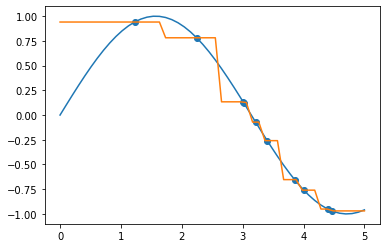

For 2 neighbors


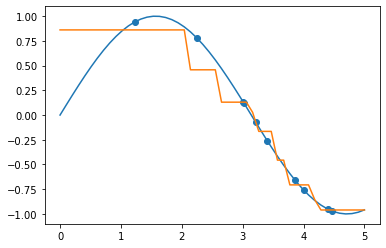

For 5 neighbors


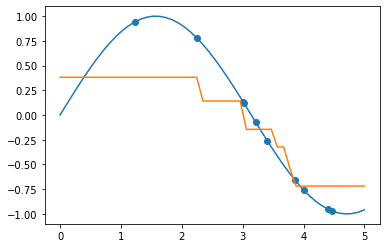

For 7 neighbors


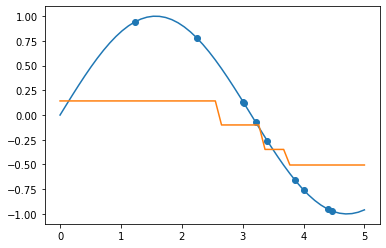

In [24]:
x1 = []
point = 10 # Количество точек для выборки
for i in range(point):
    # В диапазоне [0, 5] генерируем 10 случайных точек
    q = rd.uniform(0, 5)
    x1.append(q)

for k in (1,2,5,7):
    # Строим нашу фнкцию
    x_real = np.linspace(0, 5, 50)
    y_real = np.sin(x_real)

    print('For', k, 'neighbors')
    plt.plot(x_real, y_real)
    y1 = np.sin(x1)
    
    plt.scatter(x1, y1)
    plt.plot(x_real, funct_kNN2(x1, y1, x_real, k))
    plt.show()